In [231]:
import numpy as np
from collections import Counter
from scipy import stats
from matplotlib import pyplot as plt

In [475]:
n = 128
b = 6

In [476]:
M = np.zeros((b, n), dtype = int)
for i in range(b):
    for j in range(2**i):
        M[i, j::2**(i+1)] = 1
M

array([[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0

In [487]:
loc = []
for i in range(n):
    for j in range(n):
        if i != j:
            new_loc = np.zeros((n), dtype=int)
            new_loc[i] = 1
            new_loc[j] = 1
            loc.append(new_loc)
loc = np.array(loc).T
print(loc.shape)

(128, 16256)


In [488]:
J = (-1) ** (M @ loc)

In [489]:
signatures = []
for i in range(len(loc.T)):
    binary = (J[:, i] + 1)//2
    dec = int("".join([str(b) for b in binary]), 2)
    signatures.append(dec)
print(Counter(signatures))

Counter({31: 256, 47: 256, 15: 256, 55: 256, 23: 256, 39: 256, 7: 256, 59: 256, 27: 256, 43: 256, 11: 256, 51: 256, 19: 256, 35: 256, 3: 256, 61: 256, 29: 256, 45: 256, 13: 256, 53: 256, 21: 256, 37: 256, 5: 256, 57: 256, 25: 256, 41: 256, 9: 256, 49: 256, 17: 256, 33: 256, 1: 256, 62: 256, 30: 256, 46: 256, 14: 256, 54: 256, 22: 256, 38: 256, 6: 256, 58: 256, 26: 256, 42: 256, 10: 256, 50: 256, 18: 256, 34: 256, 2: 256, 60: 256, 28: 256, 44: 256, 12: 256, 52: 256, 20: 256, 36: 256, 4: 256, 56: 256, 24: 256, 40: 256, 8: 256, 48: 256, 16: 256, 32: 256, 0: 256, 63: 128})


In [490]:
stats.chisquare(signatures)

Power_divergenceResult(statistic=174806.01058201058, pvalue=0.0)

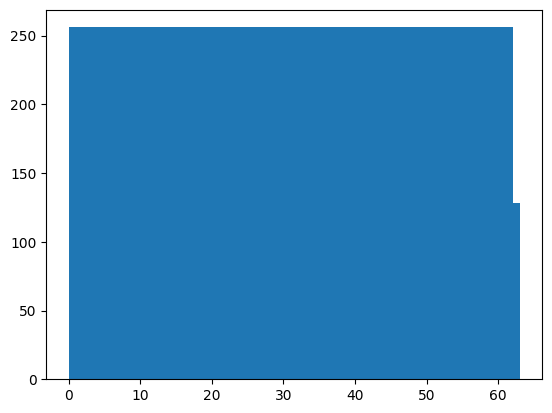

In [491]:
plt.hist(signatures, bins = 2 ** b)
plt.show()